# Capstone Project - The battle of the neighborhood - week 2

#### 1.A description of the problem and a discussion of the background.
The problem we want to solve with this data science project is to find good schools in safe boroughs in London. London comprises of 32 boroughs.  
Finding a good school in a safe borough is an important task for many families with young children and teenagers. Many families decide to move borough when it comes to choose a school.  
Although there is a lot of interest in finding good state schools in London, it is quite difficult to have a real grasp of the situation. Detailed reports on this topic are available but they are not easy to read, especially for people moving from countries with a different school system and/or from non-native English-speaking countries. The info and statistics available are not provided in a user-friendly manner and this can be quite frustrating for families moving to London.


#### 2. A description of the data and how it will be used to solve the problem.
This project uses open source data from London government authorities regarding youth crime and high-school General Certificate of Secondary Education (GCSE) achievements to find the best performing schools in the safest London boroughs.

Each borough comprises of variuos neighborhoods. The neighboorhoods within a borough that meet the conditions (i.e. good schools and safety) will be explored using Foursquare API aiming to highlight the most common venues categories (e.g. restaurants, pharmacies, train stations etc.) in each neighborhood. The neighborhoods will be then clustered by similar characteristics (e.g. good transport links) using k-mean algorithm and Folium library to visualise the different clusters on the London borough map. This would give an insight on the quality of life in the relevant neighborhoods and thereby help families with their choices.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 2>

1.  Download and explore London government authorities data  

2.  Scraping data from the web to create a dataset with London Borough and corresponding coordinates  

3. Explore the safest Boroughs and their neighborhoods with highest achieving high schools in London  

4. Analyze Each Neighborhood for the top borough (i.e. high achieving schools in a safe borough)  

5.  Cluster Neighborhoods  

6. Examine Clusters and draw conclusions  
</font>
</div>

### Import the main libraries 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # to get latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import the libraries BeautifulSoup and io
import bs4 as bs
from bs4 import BeautifulSoup
import io
import urllib.request


print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


## 1. Download and explore London government authorities data

In [2]:
#Downloading youth_knife_crime per London borough and creating youth_knife_crime dataframe
##data available at https://www.london.gov.uk/mopac-disclosure-log/london-knife-crime-statistics
youth_knife_crime=pd.read_csv('London_borough_knife_crime .csv') 
youth_knife_crime.drop([33]).reset_index(drop=True)
youth_knife_crime=youth_knife_crime.drop([32, 33, 34])
youth_knife_crime

,London Borough,2017/18 Total,2017/18 With Injury,2018/2019 Total,2018/2019 With Injury,% Change in total 2017/18 - 2018/19
0,Westminster,650.0,169.0,985.0,199,0.5154
1,Southwark,866.0,318.0,777.0,239,-0.1028
2,Haringey,794.0,229.0,764.0,179,-0.0378
3,Newham,787.0,235.0,696.0,197,-0.1156
4,Brent,766.0,241.0,680.0,191,-0.1123
5,Tower Hamlets,715.0,217.0,667.0,221,-0.0671
6,Hackney,578.0,192.0,650.0,169,0.1246
7,Enfield,589.0,182.0,617.0,167,0.0475
8,Islington,631.0,188.0,578.0,153,-0.0840
9,Lewisham,566.0,196.0,574.0,165,0.0141


In [3]:
#Downloading GCSEs_achievement per London borough and creating GCSEs_borough dataframe
#data available at https://data.london.gov.uk/dataset/gcse-results-by-borough

GCSEs_borough=pd.read_csv('GCSEs_results_borough.csv')
GCSEs_borough.drop([32]).reset_index(drop=True)
GCSEs_borough=GCSEs_borough.drop([32, 33, 34])
GCSEs_borough

,London Borough,% pupils achieving Math & English strong 9-5 pass,% pupils achieving Math & English standard 9-4 pass
0,Barking and Dagenham,40.2,60.0
1,Barnet,60.6,76.0
2,Bexley,51.0,69.1
3,Brent,50.9,69.5
4,Bromley,49.3,70.0
5,Camden,47.0,66.0
6,Croydon,42.2,63.1
7,Ealing,51.9,69.2
8,Enfield,41.4,61.3
9,Greenwich,39.0,58.0


### 2. Scraping data from the web to create a dataset with London Borough and corresponding coordinates (latitude, longitude)

Using BeautifulSoup to scrape the <a href=https://en.wikipedia.org/wiki/List_of_London_boroughs>**List of London Boroughs**</a> from Wikipedia

In [4]:
#Creating the source from which to scrape the data from the table called London "List of London boroughs" from the wikipedia page.
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_London_boroughs').read()

In [5]:
#Creating table object with BeautifulSoup
soup=BeautifulSoup(source, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":881899861,"wgRevisionId":881899861,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinate lists","Articles with Geo","London boroughs","Lists of places in London"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June

In [6]:
# Getting the table from  Wikipedia
table = soup.find('table',{'class':'wikitable sortable'})
print(table)

<table class="wikitable sortable" style="font-size:100%" width="100%">
<tbody><tr>
<th>Borough
</th>
<th>Inner
</th>
<th>Status
</th>
<th>Local authority
</th>
<th>Political control
</th>
<th>Headquarters
</th>
<th>Area (sq mi)
</th>
<th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Co-ordinates
</th>
<th><span style="background:#67BCD3"> Nr. in map </span>
</th></tr>
<tr>
<td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
</td>
<td>
</td>
<td>
</td>
<td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
</td>
<td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
</td>
<td><a class="new" href="/w/index.php?title=Barking_Town_Hall&amp;action

In [7]:
#Scraping the Borough and Co-ordinates headers from "List of boroughs and local authorities" from wikipedia
table_header=table.find_all('th')
headers=[]
for th in table_header:
    headers.append(th.text.strip('\n'))
    
        
import pandas as pd

df_1=pd.DataFrame(headers)
df_1
#Keeping just two headers out of eight. I keep borough and (borough) coordinates (latitude and longitude)
df_2=df_1.iloc[[0, 8]]
df_2.reset_index(drop=True)

,0
0,Borough
1,Co-ordinates


In [8]:
#Getting the rows for such column headers
table_rows=table.find_all('tr')

list_of_rows=[]
for tr in table_rows:
    td=tr.find_all('td')
    row = [item.text.strip('\n') for item in td]
    list_of_rows.append(row)
    
df_3=pd.DataFrame(list_of_rows)
df_3=df_3.drop(df_3.columns[[1, 2, 3, 4, 5, 6, 7, 9]], axis=1)
df_3
df_4=df_3.drop([0], axis=0)
df_4.reset_index(drop=True)
df_4.columns=['Borough', 'coordinates']
df_4

,Borough,coordinates
1,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
2,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
3,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
4,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
5,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...
6,Camden,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...
7,Croydon,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...
8,Ealing,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...
9,Enfield,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...
10,Greenwich [note 2],51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...


In [9]:
# removing notes from Boroughs
df_4['Borough'][1]='Barking and Dagenham'
df_4['Borough'][10]='Greenwich'
df_4['Borough'][12]='Hammersmith and Fulham'
df_4.reset_index(drop=True)


,Borough,coordinates
0,Barking and Dagenham,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...
5,Camden,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...
6,Croydon,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...
7,Ealing,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...
8,Enfield,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...
9,Greenwich,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...


### London districts with the best performing schools

In [10]:
#Best performing schools in GCSEs by London borough

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#from column to list
boroughs = GCSEs_borough['London Borough'].tolist()
#from list to tuple
def convert(series): 
    return tuple(i for i in series)

boroughs=convert(boroughs)
y_pos = np.arange(len(boroughs))
y_pos

GCSE_strong_performance = GCSEs_borough['% pupils achieving Math & English strong 9-5 pass'].tolist()
GCSE_strong_performance
plt.bar(y_pos, GCSE_strong_performance, align='center', alpha=0.5)
plt.xticks(y_pos, boroughs, rotation='vertical')
plt.ylabel('Percentage pupils')
plt.title('GCSE Math & English strong 9-5 pass in the London boroughs')
plt

<module 'matplotlib.pyplot' from 'F:\\Ellie\\lib\\site-packages\\matplotlib\\pyplot.py'>

#### The barchart 'GCSE Math & English strong 9-5 pass in the London boroughs' shows that percentage of pupils attending high schools either in Kingston or Sutton boroughs achieve the best grades in Math and English GCSEs 

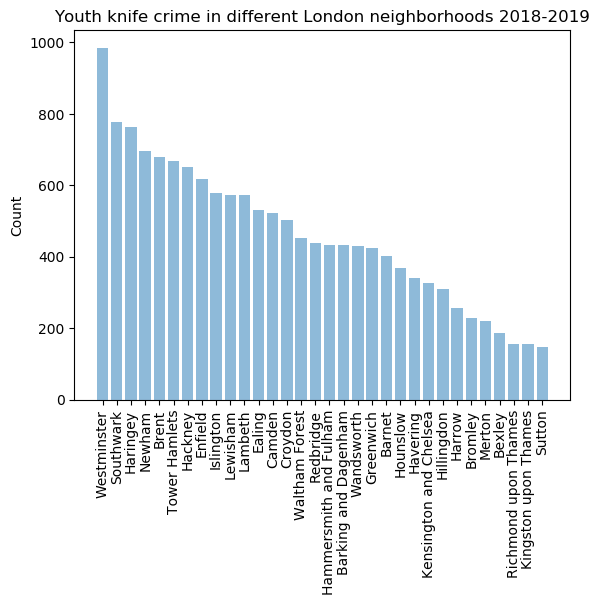

In [11]:
#Best performing schools in GCSEs by London borough

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#from column to list
boroughs = youth_knife_crime['London Borough'].tolist()

#from list to tuple
def convert(list): 
    return tuple(i for i in list)

boroughs=convert(boroughs)

y_pos = np.arange(len(boroughs))
knife_crime = youth_knife_crime['2018/2019 Total'].tolist()

plt.bar(y_pos, knife_crime, align='center', alpha=0.5)
plt.xticks(y_pos, boroughs, rotation='vertical')
plt.ylabel('Count')
plt.title('Youth knife crime in different London neighborhoods 2018-2019')

plt.show()

### Conclusion 1. Kingston upon Thames and Sutton are the safest boroughs in London. 
### - Exploring the Royal Borough of Sutton (finding and scraping the districts names from Wikipedia)

In [12]:
## Exploring the London borough of Sutton
# A list of the districts of the borough of Sutton can be found at https://en.wikipedia.org/wiki/London_Borough_of_Sutton
#Creating the source from which to scrape the data from the wikipedia page.
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/London_Borough_of_Sutton').read()

In [13]:
#Creating table object with BeautifulSoup
soup=BeautifulSoup(source, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   London Borough of Sutton - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"London_Borough_of_Sutton","wgTitle":"London Borough of Sutton","wgCurRevisionId":917084951,"wgRevisionId":917084951,"wgArticleId":95358,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","CS1 maint: archived copy as title","CS1 maint: extra text: authors list","All articles with dead external links","Articles with dead external links from June 2016","EngvarB from September 2014","Use dmy dates from September 2014","Articles with short description","Articles with hAudio microformats","Commons category link is on Wikidata","Pages including recorded pronunciations (UK English)","Lon

In [14]:
#Scraping the districts in the Rayal borough of Surbiton
sutton_list=[]
for item in soup.findAll('div',{'class':'div-col columns column-width'}):
    sub_items = item.findAll('li')
    for sub_item in sub_items:
        sutton_list.append(sub_item.text)
        sutton_list
        
print(sutton_list)

['Bandon Hill', 'Beddington', 'Beddington Corner', 'Belmont', 'Benhilton', 'Carshalton', 'Carshalton Beeches', 'Carshalton on the Hill', 'Cheam', 'Hackbridge', 'Little Woodcote', 'North Cheam', 'Rosehill', 'St. Helier', 'South Beddington', 'Sutton (principal town)', 'Sutton Common', 'Sutton High Street (located within Sutton)', 'The Wrythe', 'Wallington', 'Woodcote Green', 'Worcester Park', 'Beddington Park', 'Carshalton Park', 'Cheam Park', 'Grove Park', 'Lakeside', 'Manor Park, Sutton town centre', 'Mellows Park', 'Nonsuch Park', 'Oaks Park', 'Rosehill Park East and West', 'Overton Park', 'Poulter Park Poulter Park', "Queen Mary's Park", 'Roundshaw Down', 'Royston Park', "Seer's Park", 'St Helier Open Space', 'The Wandle Walkway']


In [15]:
# districts of Sutton
sutton_districts=sutton_list[:22]
sutton_districts

['Bandon Hill',
 'Beddington',
 'Beddington Corner',
 'Belmont',
 'Benhilton',
 'Carshalton',
 'Carshalton Beeches',
 'Carshalton on the Hill',
 'Cheam',
 'Hackbridge',
 'Little Woodcote',
 'North Cheam',
 'Rosehill',
 'St. Helier',
 'South Beddington',
 'Sutton (principal town)',
 'Sutton Common',
 'Sutton High Street (located within Sutton)',
 'The Wrythe',
 'Wallington',
 'Woodcote Green',
 'Worcester Park']

In [16]:
#Creating a dataframe with borough of Sutton, districts and latitude and longitude
df_5=pd.DataFrame(sutton_districts)
df_5.columns=['District']
borough=['Sutton' for i in range(22)]
df_5['Borough']=borough
cols_swap=["Borough","District"]
df_5=df_5.reindex(columns=cols_swap)
df_5['District'][15]='Sutton'
df_5['District'][17]='Sutton High Street'
df_5['Latitude']=['' for i in range(22)]
df_5['Longitude']=['' for i in range(22)]
df_5=df_5.drop([7])
df_5

,Borough,District,Latitude,Longitude
0,Sutton,Bandon Hill,,
1,Sutton,Beddington,,
2,Sutton,Beddington Corner,,
3,Sutton,Belmont,,
4,Sutton,Benhilton,,
5,Sutton,Carshalton,,
6,Sutton,Carshalton Beeches,,
8,Sutton,Cheam,,
9,Sutton,Hackbridge,,
10,Sutton,Little Woodcote,,


### Getting latitude and longitude of the districts in the Royal Borough of Sutton with foursquare API

In [17]:
district_list=df_5.District.tolist()
district_list

['Bandon Hill',
 'Beddington',
 'Beddington Corner',
 'Belmont',
 'Benhilton',
 'Carshalton',
 'Carshalton Beeches',
 'Cheam',
 'Hackbridge',
 'Little Woodcote',
 'North Cheam',
 'Rosehill',
 'St. Helier',
 'South Beddington',
 'Sutton',
 'Sutton Common',
 'Sutton High Street',
 'The Wrythe',
 'Wallington',
 'Woodcote Green',
 'Worcester Park']

In [18]:
latitude = []
longitude = []
for i in range(len(district_list)):
    address = '{},Sutton,London'.format(district_list[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    latitude
    longitude

### Table of the districts (i.e. neighborhood) in the Royal Borough of Sutton with corresponding latitude and longitude ( important data for searching venues with foursquare API)

In [19]:
df_5['Latitude']=latitude
df_5['Longitude']=longitude
df_5

,Borough,District,Latitude,Longitude
0,Sutton,Bandon Hill,51.364777,-0.134833
1,Sutton,Beddington,51.371988,-0.132393
2,Sutton,Beddington Corner,51.386942,-0.149532
3,Sutton,Belmont,51.343785,-0.201152
4,Sutton,Benhilton,51.371642,-0.191571
5,Sutton,Carshalton,51.365788,-0.161086
6,Sutton,Carshalton Beeches,51.357196,-0.169351
8,Sutton,Cheam,51.357616,-0.216241
9,Sutton,Hackbridge,51.379613,-0.156754
10,Sutton,Little Woodcote,51.346076,-0.145932


### Visualizing the districts in Sutton Royal Borough of London

In [20]:
# Sutton is the center location of Sutton Royal Borough
address = '{},Sutton,London'.format(district_list[15])
geolocator = Nominatim(user_agent="London_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sutton are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Sutton are 51.3753729, -0.1960317.


In [21]:
# create map of Sutton using latitude and longitude values
map_sutton = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, district in zip(df_5['Latitude'], df_5['Longitude'], df_5['Borough'], df_5['District']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sutton)  
    
map_sutton

## 3. Explore the safest Boroughs and their neighborhoods with highest achieving high schools in London

1. The task is to find venues within a 500 meter radius of each district in the Rayal Borough of Sutton
1. Prepare venues data for PCA using hot-encoding
1. Deternimne the mean for each district
1. Running K-means clustering (k=5)

In [22]:
# Defining Foursquare credentials and version
CLIENT_ID = 'CZYEM15LS4UA5JZQQST5BNODI5RHDKMCNZAKQVDDIYOWJ1KB' # your Foursquare ID
CLIENT_SECRET = 'KBY2IB4DOTCOS2BJNT32P1WX2OXKNAO2WO3VVHUWHRDUIUMX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CZYEM15LS4UA5JZQQST5BNODI5RHDKMCNZAKQVDDIYOWJ1KB
CLIENT_SECRET:KBY2IB4DOTCOS2BJNT32P1WX2OXKNAO2WO3VVHUWHRDUIUMX


In [23]:
# Exploring 1st district in df_5
df_5.loc[0, 'District']

'Bandon Hill'

In [24]:
# Getting latitude and longitude of Baddon Hill district (or also neighborhood)
neighborhood_latitude = df_5.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_5.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_5.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bandon Hill are 51.3647773, -0.134832598285069.


### Top 100 venues in  Bandon Hill

In [25]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=CZYEM15LS4UA5JZQQST5BNODI5RHDKMCNZAKQVDDIYOWJ1KB&client_secret=KBY2IB4DOTCOS2BJNT32P1WX2OXKNAO2WO3VVHUWHRDUIUMX&v=20180605&ll=51.3647773,-0.134832598285069&radius=500&limit=100'

In [26]:
#Getting the request for Bandon Hill
results = requests.get(url).json()

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
# Cleaning the json and structure it into a pandas dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues   #There is not much to do in Bandon Hill. Still there is a Pub. 

,name,categories,lat,lng
0,The Plough,Pub,51.367633,-0.132089
1,Demesne Rd Allotments,Garden,51.362752,-0.140418
2,Mellows Park,Park,51.360692,-0.134101


In [29]:
print('For Bandon Hill {} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

For Bandon Hill 3 venues were returned by Foursquare.


#### Function that repeat the request to Foursquare for all the districts of the Royal Borough of Sutton

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
# Creating a new dataframe sutton_districts_venues
sutton_districts_venues = getNearbyVenues(names=df_5['District'],
                                   latitudes=df_5['Latitude'],
                                   longitudes=df_5['Longitude']
                                  )

In [32]:
print(sutton_districts_venues.shape)
sutton_districts_venues.head(10)

(220, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bandon Hill,51.364777,-0.134833,The Plough,51.367633,-0.132089,Pub
1,Bandon Hill,51.364777,-0.134833,Demesne Rd Allotments,51.362752,-0.140418,Garden
2,Bandon Hill,51.364777,-0.134833,Mellows Park,51.360692,-0.134101,Park
3,Beddington,51.371988,-0.132393,Carew Manor,51.370983,-0.136604,Park
4,Beddington,51.371988,-0.132393,Wickes,51.375476,-0.131014,Hardware Store
5,Beddington,51.371988,-0.132393,Asif Balti House,51.367795,-0.132356,Indian Restaurant
6,Beddington,51.371988,-0.132393,The Plough,51.367633,-0.132089,Pub
7,Beddington Corner,51.386942,-0.149532,Bensons for Beds,51.390360,-0.148780,Furniture / Home Store
8,Beddington Corner,51.386942,-0.149532,Traq,51.389091,-0.144979,Racetrack
9,Beddington Corner,51.386942,-0.149532,TNT Croydon Depot,51.389079,-0.144074,Business Service


In [33]:
# How many venues per district (i.e. neighborhood)
sutton_districts_venues.groupby('Neighborhood').count()  #NOT MUCH REALLY!! Sutton must be a rural district of London 

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bandon Hill,3,3,3,3,3,3
Beddington,4,4,4,4,4,4
Beddington Corner,3,3,3,3,3,3
Belmont,4,4,4,4,4,4
Benhilton,8,8,8,8,8,8
Carshalton,15,15,15,15,15,15
Carshalton Beeches,5,5,5,5,5,5
Cheam,25,25,25,25,25,25
Hackbridge,4,4,4,4,4,4


In [34]:
print('There are {} uniques categories.'.format(len(sutton_districts_venues['Venue Category'].unique())))

There are 61 uniques categories.


### Conclusion 2:  
- The Royal Borough of Sutton must be a rural district of London as the number of venues is pretty low. That's fine with families with children but probably it's not for young couples or singles.

## 4. Analyze Each Neighborhood for the top borough (i.e. high achieving schools in a safe borough)

In [35]:
# one hot encoding
sutton_districts_onehot = pd.get_dummies(sutton_districts_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sutton_districts_onehot['Neighborhood'] = sutton_districts_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sutton_districts_onehot.columns[-1]] + list(sutton_districts_onehot.columns[:-1])
sutton_districts_onehot = sutton_districts_onehot[fixed_columns]

sutton_districts_onehot.head(10)

,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bookstore,Breakfast Spot,Bus Stop,Business Service,Café,Clothing Store,Coffee Shop,Convenience Store,Creperie,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,French Restaurant,Furniture / Home Store,Garden,Garden Center,Gastropub,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,Hotel,Indian Restaurant,Irish Pub,Italian Restaurant,Lebanese Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Platform,Portuguese Restaurant,Pub,Racetrack,Restaurant,River,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Soccer Field,Social Club,Spanish Restaurant,Sports Club,Stationery Store,Supermarket,Tea Room,Tennis Court,Thai Restaurant,Train Station,Turkish Restaurant,Veterinarian,Video Game Store,Women's Store
0,Bandon Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bandon Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bandon Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Beddington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Beddington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Beddington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Beddington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Beddington Corner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Beddington Corner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Beddington Corner,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
sutton_districts_onehot.shape

(220, 62)

In [37]:
# Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category
sutton_districts_grouped = sutton_districts_onehot.groupby('Neighborhood').mean().reset_index()
sutton_districts_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bookstore,Breakfast Spot,Bus Stop,Business Service,Café,Clothing Store,Coffee Shop,Convenience Store,Creperie,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,French Restaurant,Furniture / Home Store,Garden,Garden Center,Gastropub,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,Hotel,Indian Restaurant,Irish Pub,Italian Restaurant,Lebanese Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Platform,Portuguese Restaurant,Pub,Racetrack,Restaurant,River,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Soccer Field,Social Club,Spanish Restaurant,Sports Club,Stationery Store,Supermarket,Tea Room,Tennis Court,Thai Restaurant,Train Station,Turkish Restaurant,Veterinarian,Video Game Store,Women's Store
0,Bandon Hill,0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.333333,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.333333,0.0000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Beddington,0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.25,0.0,0.000000,0.000000,0.250,0.000000,0.000000,0.0000,0.250000,0.0000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Beddington Corner,0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.333333,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.333333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Belmont,0.00,0.25,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.250000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
4,Benhilton,0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.125000,0.125000,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.125000,0.000000,0.125000,0.00,0.0,0.000000,0.000000,0.125,0.000000,0.000000,0.0000,0.125000,0.0000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Carshalton,0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.066667,0.000000,0.066667,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.133333,0.000000,0.066667,0.00,0.0,0.066667,0.066667,0.000,0.000000,0.000000,0.0000,0.133333,0.0000,0.000000,0.000000,0.066667,0.000000,0.133333,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000
6,Carshalton Beeches,0.00,0.00,0.000000,0.0000,0.200000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.

In [38]:
# New size
sutton_districts_grouped.shape

(21, 62)

### Top 5 most common venues per district (i.e. neighborhood)

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sutton_districts_grouped['Neighborhood']

for ind in np.arange(sutton_districts_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sutton_districts_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bandon Hill,Park,Garden,Pub,Women's Store,Electronics Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store,Gastropub
1,Beddington,Indian Restaurant,Hardware Store,Park,Pub,Electronics Store,Gym / Fitness Center,Gym,Grocery Store,Gastropub,Garden Center
2,Beddington Corner,Business Service,Furniture / Home Store,Racetrack,Women's Store,Electronics Store,Health Food Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store
3,Belmont,Electronics Store,Asian Restaurant,Train Station,Pub,Women's Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store,Gastropub
4,Benhilton,Indian Restaurant,Park,Coffee Shop,Clothing Store,Pizza Place,Supermarket,Grocery Store,Gym / Fitness Center,Gastropub,Fast Food Restaurant


**Comment:** Foursquare API gives these venues. However, we must remember that the results depend on the time of the day the request was carried out. This means that the order of the venues can change depending when the request is carried out.

# 6. Examine Clusters and draw conclusions

- *k*-means to cluster the neighborhood into 5 clusters.

In [41]:
# set number of clusters
kclusters = 5

sutton_districts_grouped_clustering = sutton_districts_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sutton_districts_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 3, 0, 0, 0, 0, 0, 2, 1])

In [42]:
df_5.columns

Index(['Borough', 'District', 'Latitude', 'Longitude'], dtype='object')

In [43]:
df_5.columns=['Borough', 'Neighborhood', 'Latitude', 'Longitude']
df_5.head()

,Borough,Neighborhood,Latitude,Longitude
0,Sutton,Bandon Hill,51.364777,-0.134833
1,Sutton,Beddington,51.371988,-0.132393
2,Sutton,Beddington Corner,51.386942,-0.149532
3,Sutton,Belmont,51.343785,-0.201152
4,Sutton,Benhilton,51.371642,-0.191571


In [44]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bandon Hill,Park,Garden,Pub,Women's Store,Electronics Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store,Gastropub
1,Beddington,Indian Restaurant,Hardware Store,Park,Pub,Electronics Store,Gym / Fitness Center,Gym,Grocery Store,Gastropub,Garden Center
2,Beddington Corner,Business Service,Furniture / Home Store,Racetrack,Women's Store,Electronics Store,Health Food Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store
3,Belmont,Electronics Store,Asian Restaurant,Train Station,Pub,Women's Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store,Gastropub
4,Benhilton,Indian Restaurant,Park,Coffee Shop,Clothing Store,Pizza Place,Supermarket,Grocery Store,Gym / Fitness Center,Gastropub,Fast Food Restaurant
5,Carshalton,Grocery Store,Pub,Park,Café,Veterinarian,Historic Site,Train Station,Hotel,Tea Room,Platform
6,Carshalton Beeches,Health Food Store,Italian Restaurant,Train Station,Bakery,Grocery Store,Electronics Store,Hardware Store,Gym / Fitness Center,Gym,Gastropub
7,Cheam,Grocery Store,Italian Restaurant,Pub,Coffee Shop,Indian Restaurant,Soccer Field,Creperie,Gastropub,Gym / Fitness Center,Park
8,Hackbridge,Convenience Store,Train Station,Park,River,Women's Store,Garden,Fast Food Restaurant,Fish & Chips Shop,French Restaurant,Furniture / Home Store
9,Little Woodcote,Park,Garden Center,Sports Club,Coffee Shop,Women's Store,Electronics Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store


In [45]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
sutton_districts_merged = df_5

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sutton_districts_merged = df_5.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sutton_districts_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sutton,Bandon Hill,51.364777,-0.134833,4,Park,Garden,Pub,Women's Store,Electronics Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store,Gastropub
1,Sutton,Beddington,51.371988,-0.132393,4,Indian Restaurant,Hardware Store,Park,Pub,Electronics Store,Gym / Fitness Center,Gym,Grocery Store,Gastropub,Garden Center
2,Sutton,Beddington Corner,51.386942,-0.149532,3,Business Service,Furniture / Home Store,Racetrack,Women's Store,Electronics Store,Health Food Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store
3,Sutton,Belmont,51.343785,-0.201152,0,Electronics Store,Asian Restaurant,Train Station,Pub,Women's Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store,Gastropub
4,Sutton,Benhilton,51.371642,-0.191571,0,Indian Restaurant,Park,Coffee Shop,Clothing Store,Pizza Place,Supermarket,Grocery Store,Gym / Fitness Center,Gastropub,Fast Food Restaurant


In [46]:
# Visualize the clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sutton_districts_merged['Latitude'],sutton_districts_merged['Longitude'], sutton_districts_merged['Neighborhood'], sutton_districts_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 6. Examine Clusters and draw conclusions  

#### Cluster 1

In [47]:
sutton_districts_merged.loc[sutton_districts_merged['Cluster Labels'] == 0, sutton_districts_merged.columns[[1] + list(range(5, sutton_districts_merged.shape[1]))]].reset_index(drop=True)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Belmont,Electronics Store,Asian Restaurant,Train Station,Pub,Women's Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store,Gastropub
1,Benhilton,Indian Restaurant,Park,Coffee Shop,Clothing Store,Pizza Place,Supermarket,Grocery Store,Gym / Fitness Center,Gastropub,Fast Food Restaurant
2,Carshalton,Grocery Store,Pub,Park,Café,Veterinarian,Historic Site,Train Station,Hotel,Tea Room,Platform
3,Carshalton Beeches,Health Food Store,Italian Restaurant,Train Station,Bakery,Grocery Store,Electronics Store,Hardware Store,Gym / Fitness Center,Gym,Gastropub
4,Cheam,Grocery Store,Italian Restaurant,Pub,Coffee Shop,Indian Restaurant,Soccer Field,Creperie,Gastropub,Gym / Fitness Center,Park
5,North Cheam,Coffee Shop,Supermarket,Fast Food Restaurant,Seafood Restaurant,Soccer Field,Social Club,Pub,Gym / Fitness Center,Grocery Store,Turkish Restaurant
6,Sutton,Pub,Clothing Store,Coffee Shop,Italian Restaurant,Bar,Pizza Place,Café,Women's Store,Sandwich Place,Hotel
7,Sutton High Street,Pub,Coffee Shop,Italian Restaurant,Bar,Pizza Place,Café,Electronics Store,Hotel,Irish Pub,Park
8,The Wrythe,Pub,Grocery Store,Café,Gym / Fitness Center,Historic Site,Hotel,Train Station,Platform,Tea Room,Park
9,Wallington,Grocery Store,Bakery,Supermarket,Spanish Restaurant,Pizza Place,Portuguese Restaurant,Pub,Convenience Store,Coffee Shop,Fast Food Restaurant


In [62]:
cluster1=sutton_districts_merged.loc[sutton_districts_merged['Cluster Labels'] == 0, sutton_districts_merged.columns[[1] + list(range(5, sutton_districts_merged.shape[1]))]].reset_index(drop=True)
cluster1.Neighborhood.tolist()

['Belmont',
 'Benhilton',
 'Carshalton',
 'Carshalton Beeches',
 'Cheam',
 'North Cheam',
 'Sutton',
 'Sutton High Street',
 'The Wrythe',
 'Wallington',
 'Worcester Park']

#### Cluster 2

In [48]:
sutton_districts_merged.loc[sutton_districts_merged['Cluster Labels'] == 1, sutton_districts_merged.columns[[1] + list(range(5, sutton_districts_merged.shape[1]))]].reset_index(drop=True)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Little Woodcote,Park,Garden Center,Sports Club,Coffee Shop,Women's Store,Electronics Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store
1,St. Helier,Turkish Restaurant,Coffee Shop,Park,Breakfast Spot,Women's Store,Garden Center,Fish & Chips Shop,French Restaurant,Furniture / Home Store,Garden
2,Woodcote Green,Park,Garden Center,Coffee Shop,Women's Store,Electronics Store,Health Food Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store


#### Cluster 3

In [49]:
sutton_districts_merged.loc[sutton_districts_merged['Cluster Labels'] == 2, sutton_districts_merged.columns[[1] + list(range(5, sutton_districts_merged.shape[1]))]].reset_index(drop=True)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hackbridge,Convenience Store,Train Station,Park,River,Women's Store,Garden,Fast Food Restaurant,Fish & Chips Shop,French Restaurant,Furniture / Home Store
1,Rosehill,Park,Supermarket,Gym / Fitness Center,Tennis Court,Fast Food Restaurant,Athletics & Sports,Gym,Grocery Store,Electronics Store,Hardware Store
2,Sutton Common,Grocery Store,Athletics & Sports,Train Station,Gym / Fitness Center,Tennis Court,Park,Garden Center,Fish & Chips Shop,French Restaurant,Furniture / Home Store


#### Cluster 4

In [50]:
sutton_districts_merged.loc[sutton_districts_merged['Cluster Labels'] == 3, sutton_districts_merged.columns[[1] + list(range(5, sutton_districts_merged.shape[1]))]].reset_index(drop=True)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beddington Corner,Business Service,Furniture / Home Store,Racetrack,Women's Store,Electronics Store,Health Food Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store


#### Cluster 5

In [51]:
sutton_districts_merged.loc[sutton_districts_merged['Cluster Labels'] == 4, sutton_districts_merged.columns[[1] + list(range(5, sutton_districts_merged.shape[1]))]].reset_index(drop=True)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bandon Hill,Park,Garden,Pub,Women's Store,Electronics Store,Hardware Store,Gym / Fitness Center,Gym,Grocery Store,Gastropub
1,Beddington,Indian Restaurant,Hardware Store,Park,Pub,Electronics Store,Gym / Fitness Center,Gym,Grocery Store,Gastropub,Garden Center
2,South Beddington,Indian Restaurant,Hardware Store,Park,Pub,Electronics Store,Gym / Fitness Center,Gym,Grocery Store,Gastropub,Garden Center


### Appendix: Searching for high (and primary) schools in Sutton neighborhoods

In [52]:
#Function to get the nearby venues (radius to be set, names:neighborhood) 
def getNearbyVenues_1(names, latitudes, longitudes, radius, categoryIds):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
    
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
    
        url = url + '&categoryId={}'
        url = url.format(categoryIds)
        
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [53]:
# Use categoryIds='4bf58dd8d48988d13d941735' to retrieve highschools only
merton_highschools = getNearbyVenues_1(names=df_4, latitudes=df_5['Latitude'], longitudes=df_5['Longitude'], radius=5000 , categoryIds='4bf58dd8d48988d13d941735')

In [54]:
# Creating a new dataframe sutton_districts_venues for highschools
sutton_districts_highschools= getNearbyVenues_1(names=df_5['Neighborhood'],
                                   latitudes=df_5['Latitude'],
                                   longitudes=df_5['Longitude'],
                                   radius=3000,
                                   categoryIds='4bf58dd8d48988d13d941735'
                                  )

In [55]:
#Getting the highschools in each neighborhood of Rayal London Borough of Sutton nearby neighborhoods (radius 5000 meters)
sutton_highschools_df=pd.DataFrame(sutton_districts_highschools)
sutton_highschools_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bandon Hill,51.364777,-0.134833,Wilsons,51.358864,-0.128733,High School
1,Bandon Hill,51.364777,-0.134833,St. Andrews High School,51.368713,-0.107998,High School
2,Bandon Hill,51.364777,-0.134833,Whitgift School,51.359313,-0.101670,High School
3,Bandon Hill,51.364777,-0.134833,St Philomena's School,51.364600,-0.169293,High School
4,Beddington,51.371988,-0.132393,Wilsons,51.358864,-0.128733,High School
5,Beddington,51.371988,-0.132393,St. Andrews High School,51.368713,-0.107998,High School
6,Beddington,51.371988,-0.132393,Whitgift School,51.359313,-0.101670,High School
7,Beddington,51.371988,-0.132393,St Philomena's School,51.364600,-0.169293,High School
8,Beddington Corner,51.386942,-0.149532,Greenshaw High School,51.376150,-0.183438,High School
9,Beddington Corner,51.386942,-0.149532,St Philomena's School,51.364600,-0.169293,High School


In [63]:
sutton_highschools_df_count_by_neighborhood=sutton_highschools_df.groupby('Neighborhood')['Venue Category'].count()
sutton_highschools_df_count_by_neighborhood

Neighborhood
Bandon Hill           4
Beddington            4
Beddington Corner     2
Belmont               3
Benhilton             5
Carshalton            4
Carshalton Beeches    4
Cheam                 4
Hackbridge            3
Little Woodcote       6
North Cheam           5
Rosehill              4
South Beddington      4
St. Helier            4
Sutton                5
Sutton Common         5
Sutton High Street    5
The Wrythe            4
Wallington            3
Woodcote Green        7
Worcester Park        5
Name: Venue Category, dtype: int64

In [57]:
# Creating a new dataframe sutton_districts_venues for primary schools
sutton_districts_primaryschools= getNearbyVenues_1(names=df_5['Neighborhood'],
                                   latitudes=df_5['Latitude'],
                                   longitudes=df_5['Longitude'],
                                    radius=3000,
                                   categoryIds='4f4533804b9074f6e4fb0105'
                                  )

In [58]:
#Getting  primary schools in each neighborhood of Rayal London Borough of Sutton nearby neighborhoods (radius 5000 meters)
sutton_primaryschools_df=pd.DataFrame(sutton_districts_primaryschools)
sutton_primaryschools_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bandon Hill,51.364777,-0.134833,All Saints Carshalton CofE Primary School,51.364711,-0.158713,Elementary School
1,Bandon Hill,51.364777,-0.134833,Kingsley Primary School,51.380852,-0.118748,Elementary School
2,Bandon Hill,51.364777,-0.134833,Culvers House Primary School,51.381726,-0.159059,Elementary School
3,Bandon Hill,51.364777,-0.134833,Reliance Academy,51.382458,-0.109343,Elementary School
4,Beddington,51.371988,-0.132393,Reliance Academy,51.382458,-0.109343,Elementary School
5,Beddington,51.371988,-0.132393,All Saints Carshalton CofE Primary School,51.364711,-0.158713,Elementary School
6,Beddington,51.371988,-0.132393,Culvers House Primary School,51.381726,-0.159059,Elementary School
7,Beddington Corner,51.386942,-0.149532,Culvers House Primary School,51.381726,-0.159059,Elementary School
8,Beddington Corner,51.386942,-0.149532,Tweeddale Primary School,51.384297,-0.179665,Elementary School
9,Beddington Corner,51.386942,-0.149532,ST Teresa R C Primary School,51.388896,-0.182004,Elementary School


In [59]:
print('London Borough of Sutton: Numer of highschools {}, Number of primary schools {}'.format(len(sutton_highschools_df), len(sutton_primaryschools_df)))

London Borough of Sutton: Numer of highschools 90, Number of primary schools 118


# Conclusions

- The Royal Borough of Sutton comprises of 22 neighborhoods. This borough is the safest (youth crime: knife crime) and with 
the best performing highschools in London (governative datasets).
- Therefore Sutton is a good place for families with children to move in and live.
- The Sutton neighborhoods have been explored and the ten most popular venues per neighborhood were found (e.g. Cafe, food store, train station, international restaurants etc)
- The Sutton neighborhoods were also grouped in five clusters and 11 neighborhoods fall in the biggest cluster (cluster 1) indicating that such neighborhoods (i.e. Belmont,Benhilton,Carshalton,Carshalton Beeches,Cheam,North Cheam,Sutton,Sutton High Street, The Wrythe,Wallington,Worcester Park) are similar neighborhoods. 
- Cluster 1 neighborhoods offer more amenties than the other Sutton neighborhoods while at the same time offering the same level of safety and schooling.
Therefore, Cluster 1 neighborhoods seem to be most suitable for families with children that are looking for good schools, high level of safety but also amenities.
-Other clusters are quite small (3 and 1 neighborhoods). In such clusters there is little choice of restaurants, although in cluster 5 one gyms and pubs are quite popular.
- It's possible to spot the neighborhoods with a train station (in cluster 1 and 3). This is useful for all those people that commute to work and they might want to buy an house in the vicinity of a train station.
-Cluster 4 comprise of only one neighborhood, Beddington Corner. Such neigborhood is different from all the others. Indeed, one can see that the most popular venues (Business Service, Furniture Store, Home Store, Racetrack etc.) are different from those found for the other neighborhoods. 
- Finally, it's quite interesting to see that parks are among the most popular venues in most of the Sutton neighborhoods. This can be important for those families with young children and/or dogs.
